In [2]:

%load_ext autoreload
%autoreload 2
import os
from open_agent import OpenAgent
from config import Config
from playsound import playsound

In [3]:
print(f'Current working directory: {os.getcwd()}')

Current working directory: c:\Repos\OpenAIMagic\src


# Create an Agent
This will create an agent that is capable of talking to the OpenAI APIs

In [4]:
agent = OpenAgent(api_key=Config.api_key)

# Chat
Test the chat completion task.

In [5]:
response = agent.chat("What is the capital of France?")
print(response)

The capital of France is Paris.


# Speach to Text
Transcribe an audio file.

In [13]:
response = agent.transcribe('../data/fox.mp3')
print(response)

The quick brown fox jumped over the lazy dog.


# Text to speach
Convert text to speach

In [7]:
text = 'Black holes are among the most mysterious cosmic objects, much studied but not fully understood. These objects aren’t really holes. They’re huge concentrations of matter packed into very tiny spaces. A black hole is so dense that gravity just beneath its surface, the event horizon, is strong enough that nothing – not even light – can escape. The event horizon isn’t a surface like Earth’s or even the Sun’s. It’s a boundary that contains all the matter that makes up the black hole.'
target_file_name = '../data/text2speachtarget2.mp3'
agent.text_to_speach(text=text, target_file_name=target_file_name)
print('done')

AttributeError: 'ResponseContextManager' object has no attribute 'stream_to_file'

# Play sound file
Use a player to play the file

In [4]:
# Get full path to the file
full_path = os.path.abspath(target_file_name)
playsound(full_path)

# Streaming version of text to speach
We play the sound while streaming it. No file is saved here.

In [18]:
text = 'Black holes are among the most mysterious cosmic objects, much studied but not fully understood.'
agent.text_to_speach_stream(text=text)

# Translate text
Use a GPT to translate the text from one language to another.

In [22]:
text='The meaning of life is fourty two'
response = agent.translate_text(text=text, target_language='german')
print(response)

Der Sinn des Lebens ist zweiundvierzig.


# Caption an image
Upload an image and create a caption of it.

In [27]:
path = '../data/hitchhikers_guide.jpg'
response = agent.caption_image(image_path=path, target_language='english')
print(response)


Omslaget till "The Hitch Hiker's Guide to the Galaxy" av Douglas Adams visar en stiliserad val som svävar genom rymden, tillsammans med en mus på dess sida. Den grafiska designen bidrar till bokens sci-fi-tematik, och den framhäver den humoristiska och absurda tonen som är typisk för verket.


The image features the cover of "The Hitchhiker's Guide to the Galaxy," highlighting a whimsical illustration of a whale and a mouse against a swirling black and gray background. The title, along with the author's name, Douglas Adams, is prominently displayed, emphasizing the comedic and adventurous spirit of the book. It notes that this is "The Nearly Definitive Edition," suggesting a special release of this beloved sci-fi classic.


# Generate Images
Generate an image based on the prompt.

In [6]:
text = 'Image of a cat celebrating its birthday with its friends. The cat is wearing a party hat and there are balloons in the background. Style is photo realistic.'
file_path = '../data/cat_birthday.jpg'
agent.generate_image(text=text, target_file_name=file_path)



ModuleNotFoundError: No module named 'PIL'

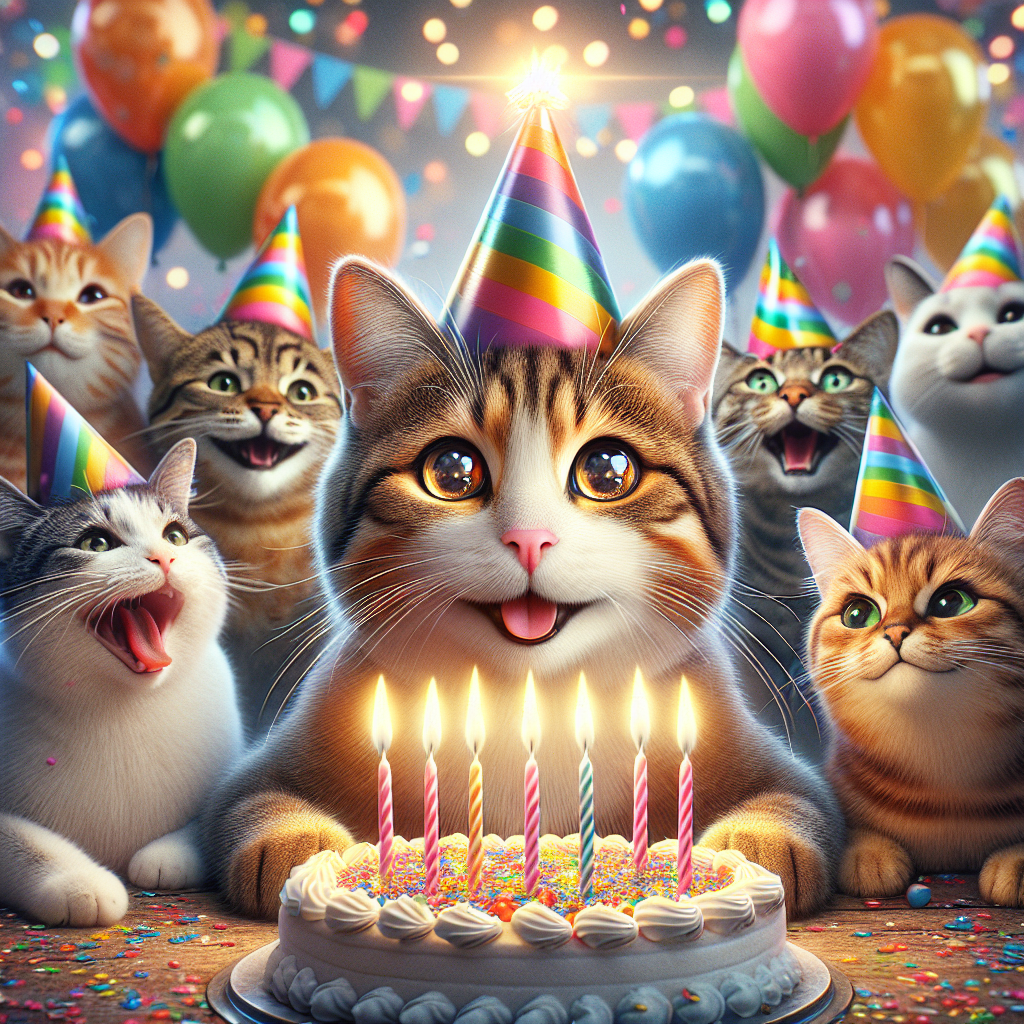

In [9]:
#Show the image
from PIL import Image
from IPython.display import display
img = Image.open(file_path)
display(img)

# Define structured output

In [5]:
from pydantic import BaseModel

class Step(BaseModel):
    explanation: str
    output: str

class MathResponse(BaseModel):
    steps: list[Step]
    final_answer: str

In [6]:
instructions = 'You are a helpful math tutor. Guide the user through the solution step by step.'
text='how can I solve 8x + 7 = -23'
response = agent.chat(text, instructions=instructions, response_format=MathResponse)

In [15]:
response

'{"steps":[{"explanation":"First, isolate the term with x by subtracting 7 from both sides of the equation.","output":"8x + 7 - 7 = -23 - 7"},{"explanation":"This simplifies to 8x = -30.","output":"8x = -30"},{"explanation":"Next, solve for x by dividing both sides of the equation by 8.","output":"x = -30 / 8"},{"explanation":"Simplify the fraction by dividing the numerator and denominator by 2.","output":"x = -15 / 4 or x = -3.75"}],"final_answer":"x = -3.75"}'

In [14]:
#Convert the string response to the MathResponse object
mathResponse = MathResponse.parse_obj(response)

# response

ValidationError: 1 validation error for MathResponse
  Input should be a valid dictionary or instance of MathResponse [type=model_type, input_value='{"steps":[{"explanation"...al_answer":"x = -3.75"}', input_type=str]
    For further information visit https://errors.pydantic.dev/2.8/v/model_type

In [12]:
for step in response:
    step
    # print(step.explanation)
    # print(step.output)

In [16]:
text = 'Image of an AI smörgåsbord. Style is photo realistic.'
file_path = '../data/ai_smorgasbord.jpg'
agent.generate_image(text=text, target_file_name=file_path)


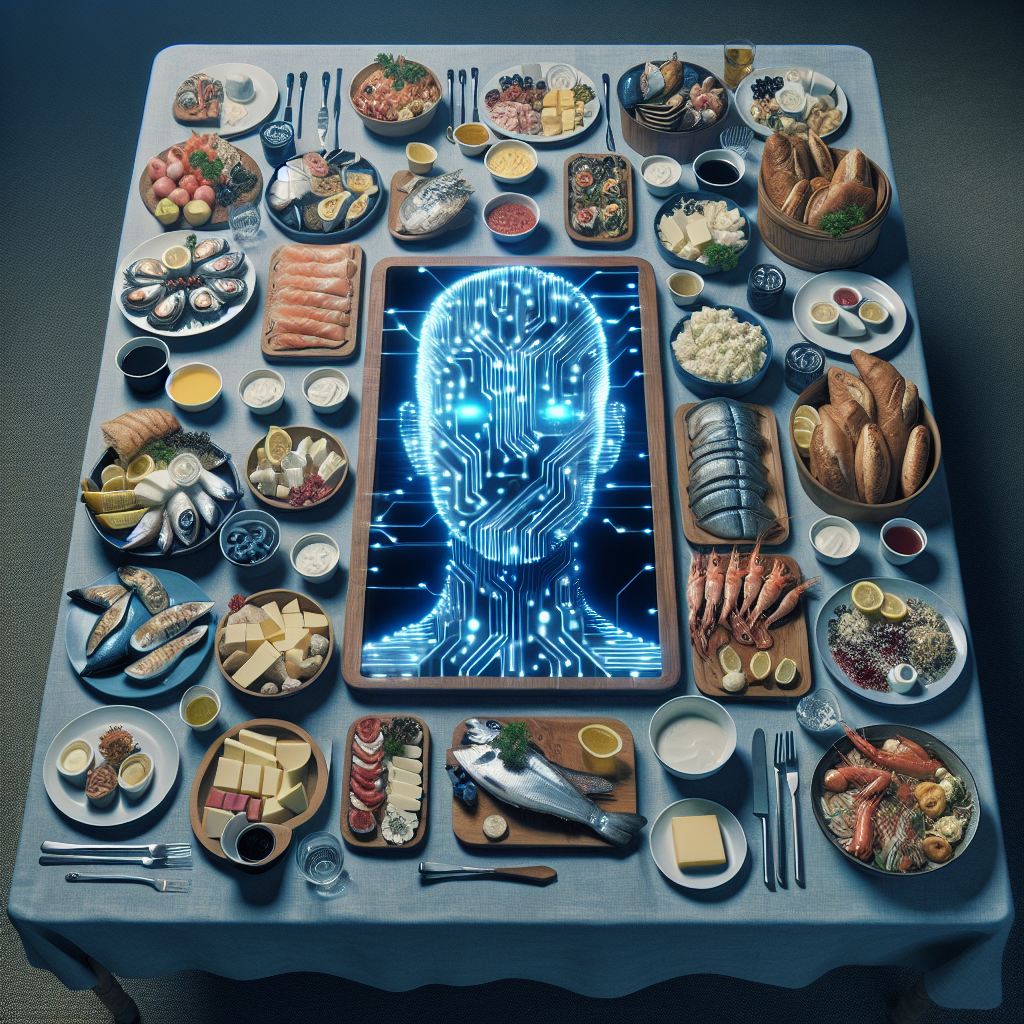

In [17]:
#Show the image
from PIL import Image
from IPython.display import display
img = Image.open(file_path)
display(img)

In [3]:
import torch
from PIL import Image
import faiss
import numpy as np
from transformers import CLIPProcessor, CLIPModel
#pip install transformers, faiss-cpu==1.9.0 , pyopenssl==24.0.0



In [4]:
# Load the CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [5]:
image_path = '../images/smargasbord.png'
text = 'Image of an AI smörgåsbord. Style is photo realistic.'
# Prepare inputs
inputs = processor(text=[text] if text else None,
                   images=Image.open(image_path) if image_path else None,
                   return_tensors="pt",
                   padding=True)

# Use the model to get embeddings
with torch.no_grad():
    outputs = model(**inputs)

# Outputs will be the text features for the provided prompt
print(outputs)

CLIPOutput(loss=None, logits_per_image=tensor([[31.5792]]), logits_per_text=tensor([[31.5792]]), text_embeds=tensor([[ 1.5644e-02,  1.8729e-02, -1.9219e-02, -1.3229e-02, -2.1382e-02,
          7.5374e-03, -5.4554e-03, -5.2506e-02,  6.5770e-02, -6.5401e-03,
          4.1607e-02,  7.6309e-04, -1.2396e-02, -1.2442e-02,  1.9131e-02,
         -1.5104e-02,  6.8531e-03,  1.9690e-02, -2.7681e-02,  4.1936e-03,
         -1.9660e-02,  1.0974e-03,  2.1833e-02, -1.3832e-02, -8.4257e-05,
          4.9610e-02,  5.5383e-03,  8.7319e-03,  2.8156e-02, -2.2967e-03,
          3.3519e-02, -5.9594e-02, -9.8627e-03, -9.0625e-03, -8.8905e-02,
         -4.2127e-02,  1.1080e-02,  3.0893e-02, -2.3176e-02, -2.0081e-02,
         -5.6929e-02,  2.6117e-02,  4.5575e-02,  4.6621e-02,  3.0006e-02,
         -3.2861e-02, -1.8337e-02, -7.5153e-03, -2.1611e-03,  8.7966e-03,
         -7.6327e-03,  2.9530e-02,  2.0270e-02, -3.3322e-02,  1.2327e-03,
          1.1839e-02,  2.3058e-03,  2.7666e-02,  4.3862e-02,  1.9670e-02,
   

In [6]:
def get_embeddings(image_path=None, text=None):
    inputs = processor(text=[text] if text else None,
                       images=Image.open(image_path) if image_path else None,
                       return_tensors="pt",
                       padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = torch.cat((outputs.image_embeds, outputs.text_embeds), dim=1).cpu().numpy()
    return embeddings

In [7]:
#Get the path of all images in the directory
import os
image_dir = '../data/dataset_super_heroes/'
supported_formats = ['png', 'jpg', 'jpeg']
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.split('.')[-1] in supported_formats]

In [8]:
# extract the file name without the extension
image_texts = [f.split('/')[-1].split('.')[0] for f in image_files]
image_texts


['batman standing up',
 'batman vintage suit',
 'flash vintage standing up',
 'supergirl illustration',
 'superman flying over cityjpg',
 'superman vintage flying',
 'the thing standing up looking furious',
 'vision in green cape standing up open hand',
 'wonder woman']

In [9]:
# Generate embeddings for the dataset
dataset_embeddings = []
for img, txt in zip(image_files, image_texts):
    print(f'Processing image: {img}')
    embedding = get_embeddings(image_path=img, text=txt)
    
    dataset_embeddings.append(embedding)

Processing image: ../data/dataset_super_heroes/batman standing up.jpg
Processing image: ../data/dataset_super_heroes/batman vintage suit.jpg
Processing image: ../data/dataset_super_heroes/flash vintage standing up.png
Processing image: ../data/dataset_super_heroes/supergirl illustration.jpg
Processing image: ../data/dataset_super_heroes/superman flying over cityjpg.jpg
Processing image: ../data/dataset_super_heroes/superman vintage flying.jpg
Processing image: ../data/dataset_super_heroes/the thing standing up looking furious.jpg
Processing image: ../data/dataset_super_heroes/vision in green cape standing up open hand.jpg
Processing image: ../data/dataset_super_heroes/wonder woman.jpg


In [35]:
len(dataset_embeddings)
dataset_embeddings[0].shape

(1, 1024)

In [10]:
# Stack embeddings and create a FAISS index
embeddings_matrix = np.vstack(dataset_embeddings)
dimension = embeddings_matrix.shape[1]
super_hero_index = faiss.IndexFlatL2(dimension)
super_hero_index.add(embeddings_matrix)

In [11]:
# Query embedding for target image and text
target_image_path = "../images/batman.jpg"
target_text = "a man in bat suit"
query_embedding = get_embeddings(image_path=target_image_path, text=target_text)



In [12]:
# Find the top 3 most similar entries
k = 2
distances, indices = super_hero_index.search(query_embedding, k)

# Display results
for rank, idx in enumerate(indices[0]):
    print(f"Rank {rank+1}: Image - {image_files[idx]}, Text - {image_texts[idx]}, Similarity - {1 - distances[0][rank]:.4f}")


: 

In [ ]:
#Display the best match
from PIL import Image
from IPython.display import display
img = Image.open(image_files[indices[0][0]])